# Import Packages

In [ ]:
#import libraries
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
from zipfile import ZipFile
import json


Mounted at /content/drive


# Network

##NETWORKX MODEL FOR INFLUENCER BRAND CATEGORY ANALYSIS

In [ ]:
#load data into a merge dataframe
merge=pd.read_csv('/content/drive/Shareddrives/capstone_prayap_nithyara/models/influencer_brand_category.csv')

###NETWORKX MODEL FOR INFLUENCER AND BRAND

In [ ]:
#import networkx library
import networkx as nx

In [ ]:
#only get influencer and brand data
merge1=merge[['Influencer','Brand']]

In [ ]:
influencer_list=list(merge1['Influencer'])

In [ ]:
#creating a networkxmodel and writing to a pickle file
g = nx.from_pandas_edgelist(merge1,'Influencer','Brand') 
#nx.draw(g)
nx.write_gpickle(g, "drive/Shareddrives/capstone_prayap_nithyara/influencer_brand.gpickle")

In [ ]:
#read networkx pickle file
G=nx.read_gpickle("drive/Shareddrives/capstone_prayap_nithyara/influencer_brand.gpickle")
#nx.draw(G)

In [ ]:
#summarizing list of brands form the model
dict1={}
dict2={}
dict3={}
for influencer in influencer_list:
  try:
    total_brands=list(nx.neighbors(G, influencer))
    #total_number=
    dict1[influencer]=total_brands
    total_number=len(total_brands)
    dict2[influencer]=total_number
    dict3[influencer]=G[influencer]
  except:
    total_brands=[]
    total_number=len(total_brands)
    #dict1[influencer]=[]
    #dict2[influencer]=0
  

dfdict1=pd.DataFrame(dict1.items())
dfdict2=pd.DataFrame(dict2.items())
dfdict3=pd.DataFrame(dict3.items())
dfdict=pd.merge(dfdict1,dfdict2,on=0)
dfdict=dfdict.rename(columns={0:'Influencer','1_x':'total_brands','1_y':'num_brands'})
dfdict.sort_values(by='num_brands',ascending=False,inplace=True)
#dfdict2.head()

In [ ]:
#sorting in descending order
dfdict.sort_values(by='num_brands',ascending=False,inplace=True)
#listing top 50 influencers by total brands
dfdict.head(50)

,Influencer,total_brands,num_brands
26071,liketoknow.it,"[bellemeetsworld, 5feetoffashion, chowdownusa,...",1351
18759,thefeedfeed,"[aspicyperspective, asassyspoon, chef_seabones...",184
1727,amgreetings,"[bloggersarahj, ashleyjtodd, advicefroma20some...",155
26865,gillettevenus,"[cecerahoerason, agypsyinthecity, blondeandamb...",131
8550,that_neon_girl,"[sojosvision, sunwingvacations, amazon, daniel...",97
9003,palavdesai,"[oliverbilou, prettymissyinc, idealofsweden, j...",94
541,charmainehungsm,"[sallybeautyuk, cluse, happysocks, soufeeljewe...",92
10807,simplyclassycassie,"[reebok, reebokclassics, aquaphorus, danielwel...",90
21586,whitewithstyle,"[beauty_n_brawn, beautyleebar, amberallurecupc...",90
4383,jana_katharina,"[lalalab, pinkbox_de, prettylittlething, nipan...",88


The influencers above are the top 50 influencers based on the number of brands that they are affiliated to.

In [ ]:
#creating a graph using load_graph function
def load_graph():
    G = nx.Graph()
    G=nx.read_gpickle("drive/Shareddrives/capstone_prayap_nithyara/influencer_brand.gpickle")
    return G

3293
Counter({1: 14025, 2: 6960, 3: 4428, 4: 3118, 5: 2280, 6: 1819, 7: 1458, 8: 1189, 9: 995, 10: 772, 11: 697, 12: 607, 13: 528, 14: 495, 15: 426, 16: 358, 17: 311, 18: 286, 19: 246, 20: 208, 21: 189, 22: 167, 23: 160, 25: 139, 24: 135, 26: 132, 27: 99, 29: 93, 28: 90, 32: 83, 30: 83, 31: 77, 33: 60, 41: 57, 36: 55, 35: 53, 37: 52, 34: 52, 39: 48, 38: 46, 44: 41, 40: 40, 42: 34, 48: 33, 45: 31, 46: 29, 47: 26, 52: 26, 49: 23, 43: 23, 56: 19, 53: 19, 62: 18, 54: 17, 51: 17, 57: 15, 63: 14, 66: 13, 61: 13, 71: 12, 50: 12, 59: 11, 55: 11, 67: 10, 78: 10, 81: 9, 58: 9, 68: 9, 75: 9, 97: 8, 79: 8, 100: 7, 85: 7, 60: 7, 98: 6, 64: 6, 65: 6, 69: 6, 80: 6, 77: 5, 70: 5, 84: 5, 108: 5, 88: 5, 76: 5, 83: 4, 96: 4, 95: 4, 82: 4, 91: 4, 73: 4, 86: 4, 87: 4, 74: 4, 114: 3, 102: 3, 90: 3, 72: 3, 99: 3, 120: 3, 92: 3, 101: 3, 110: 3, 144: 2, 161: 2, 126: 2, 337: 2, 194: 2, 311: 2, 178: 2, 117: 2, 94: 2, 217: 2, 148: 2, 151: 2, 109: 2, 285: 2, 185: 2, 89: 2, 106: 2, 124: 2, 191: 2, 93: 2, 138: 2, 13

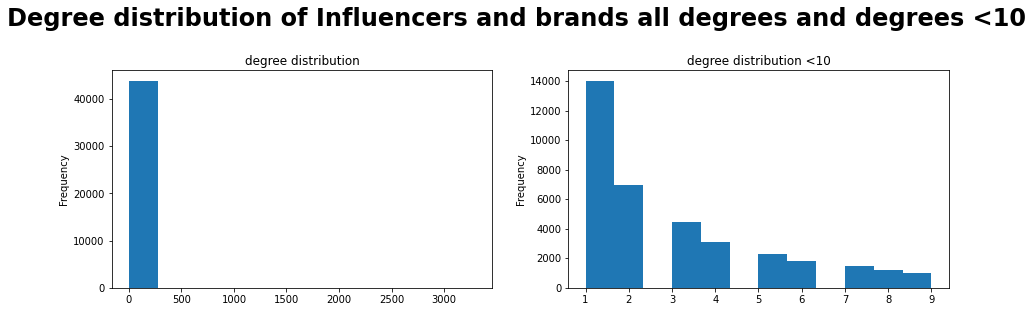

In [ ]:
#creating a function for plotting degree distribution
#improting libraries
#each degree representing each brand. So all degrees is all brands and degrees less than 10 is total brands less than 10
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from collections import Counter
def plot_degree_distribution(G):
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,4))
    fig.suptitle('Degree distribution of Influencers and brands all degrees and degrees <10',fontsize=24,fontweight='bold',y=1.10)
    degrees = [G.degree(n) for n in G.nodes()]
    print(max(degrees))
    counts = Counter(d for n, d in G.degree())
    print(counts)
    d1=[counts.get(i, 0) for i in range(max(counts) + 1)]
    num_bins=12
    result=[]
    for num in range(len(degrees)):
        if degrees[num]<10:
            result.append(degrees[num])
    ax1.hist(degrees,bins=num_bins)
    ax2.hist(result,bins=num_bins)
    ax1.set_title("degree distribution")
    ax2.set_title("degree distribution <10")
    ax1.set_ylabel("Frequency")
    ax2.set_ylabel("Frequency")
    plt.show()    
G = load_graph()
plot_degree_distribution(G)

Around 14025 out of 27091 Influencers are loyal to one brand which makes up 51.7% of the total number of Influencers. Rest of them are not loyal to just one brand. The maximum number of brands that one influencer is related to is 1351.

###MODEL FOR INFLUENCER AND CATEGORY

In [ ]:
#import networkx library
import networkx as nx

In [ ]:
#load data into merge1 dataframe
merge1=merge[['Influencer','Brand Category']]

In [ ]:
#creating a networkxmodel and writing to a pickle file
g = nx.from_pandas_edgelist(merge1,'Influencer','Brand Category') 
#nx.draw(g)
#writing output to folder in drive
nx.write_gpickle(g, "drive/Shareddrives/capstone_prayap_nithyara/influencer_category.gpickle")

In [ ]:
#load gpickle file
G=nx.read_gpickle("drive/Shareddrives/capstone_prayap_nithyara/influencer_category.gpickle")
#nx.draw(G)

In [ ]:
dict1={}
dict2={}
dict3={}
for influencer in influencer_list:
  try:
    total_brands=list(nx.neighbors(G, influencer))
   
    dict1[influencer]=total_brands
    total_number=len(total_brands)
    dict2[influencer]=total_number
    dict3[influencer]=G[influencer]
  except:
    total_brands=[]
    total_number=len(total_brands)
  

dfdict1=pd.DataFrame(dict1.items())
dfdict2=pd.DataFrame(dict2.items())
dfdict3=pd.DataFrame(dict3.items())
dfdict=pd.merge(dfdict1,dfdict2,on=0)
dfdict=dfdict.rename(columns={0:'Influencer','1_x':'total_brands','1_y':'num_brands'})
dfdict.sort_values(by='num_brands',ascending=False,inplace=True)
dfdict2.head()

,0,1
0,alisasia,1
1,about_yvi,1
2,alinatsvor,3
3,allthingskate,6
4,tabitha.willett,3


The most number of categories that any influencer has in the dataset is 16 and meadowofsix is the Influencer. 

In [ ]:
def load_graph():
    G = nx.Graph()
    G=nx.read_gpickle("drive/Shareddrives/capstone_prayap_nithyara/influencer_category.gpickle")
    return G

21925
Counter({1: 12669, 2: 5887, 3: 3273, 4: 1924, 5: 1291, 6: 785, 7: 494, 8: 318, 9: 195, 10: 107, 11: 74, 12: 39, 13: 19, 14: 13, 15: 2, 21925: 1, 1477: 1, 1836: 1, 3962: 1, 854: 1, 2669: 1, 6979: 1, 3786: 1, 3810: 1, 2841: 1, 1815: 1, 2335: 1, 2229: 1, 774: 1, 1847: 1, 2927: 1, 375: 1, 640: 1, 179: 1, 231: 1, 146: 1, 70: 1, 16: 1})


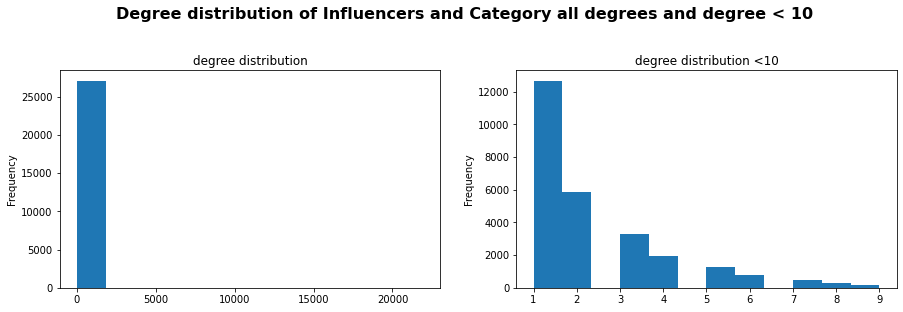

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from collections import Counter
def plot_degree_distribution(G):
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,4))
    fig.suptitle('Degree distribution of Influencers and Category all degrees and degree < 10',fontsize=16,fontweight='bold',y=1.10)
    degrees = [G.degree(n) for n in G.nodes()]
    print(max(degrees))
    counts = Counter(d for n, d in G.degree())
    print(counts)
    d1=[counts.get(i, 0) for i in range(max(counts) + 1)]
    num_bins=12
    result=[]
    for num in range(len(degrees)):
        if degrees[num]<10:
            result.append(degrees[num])
    ax1.hist(degrees,bins=num_bins)
    ax2.hist(result,bins=num_bins)
    ax1.set_title("degree distribution")
    ax2.set_title("degree distribution <10")
    ax1.set_ylabel("Frequency")
    ax2.set_ylabel("Frequency")
    plt.show()    
G = load_graph()
plot_degree_distribution(G)

Around 12699 out of 27091 Influencers are loyal to one brand category which makes up 46.9% of the total number of Influencers. Rest of them are not loyal to just one category.